In [1]:
import os, sys
import scipy
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# The Datasets

1. geometries.shp contains the geometries of the countries.
2. economy_index.json: contains the time series of the national economical index of every country. This
is to be interpreted as an indicator of the economical wealth of the country.
3. rainfall.json contains the rainfall time series for every country expressed in millimetres.
4. conflict.json provides a normalised conflict score for every country, where 1 means high levels of
conflict while 0 means no conflict at all.
5. food_security.csv: provides a food security score for some of the countries where 1 means high levels
of food security while 0 refers to a situation of extreme food insecurity. The formula on which the food
security indicator is built can be assumed constant for all countries

# Objectives

The suggested tasks are:

1. Merge all datasets into one unique file exploiting the information on the provided geometries or the indexes -> “unique source of truth”
2. Analyse and describe the events that occurred according to the data and the relationship between the provided food security indicator and the input data.
3. For the countries with no food security indicator infer its value from the input variables for the entire time window. The entire time series can be reconstructed
4. Analyse the performance of the inference model used. 

# Geometries

In [2]:
geometries_gdf = gpd.read_file("./data_for_test/geometries.shx")
geometries_gdf.head()

,name,geometry
0,0,"POLYGON ((6.18632 49.46380, 6.65823 49.20196, ..."
1,1,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
2,2,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
3,3,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
4,4,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."


<AxesSubplot:>

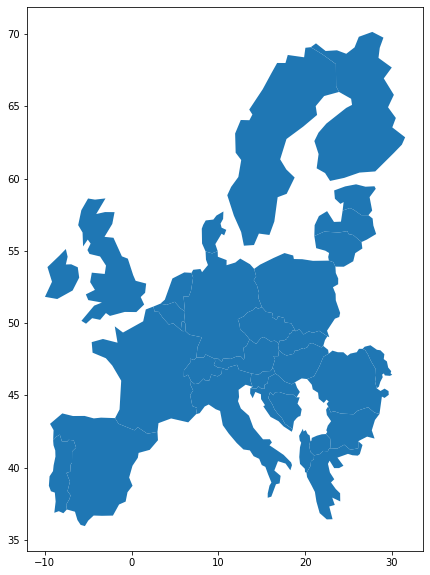

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
geometries_gdf.plot(ax=ax)

# Economic Index

In [4]:
econ_index = pd.read_json("./data_for_test/economy_index.json").transpose()
econ_index.head()

,timestamps,longlat,country_index
90,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2.339088646029322, 46.60646337286316]","[52.070614423569296, 52.35771600662421, 52.232..."
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16.59626584684802, 62.811484968080336]","[52.46364376657851, 52.69085209309422, 52.5963..."
11,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[19.31101430844868, 52.14826021933187]","[43.22030072459218, 42.33757572283142, 41.6600..."
112,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[14.076158884337072, 47.6139487927463]","[55.239678766385026, 55.27238771923675, 54.506..."
111,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[19.357628627745918, 47.19995117195427]","[56.83547763805197, 57.18940518698663, 57.2177..."


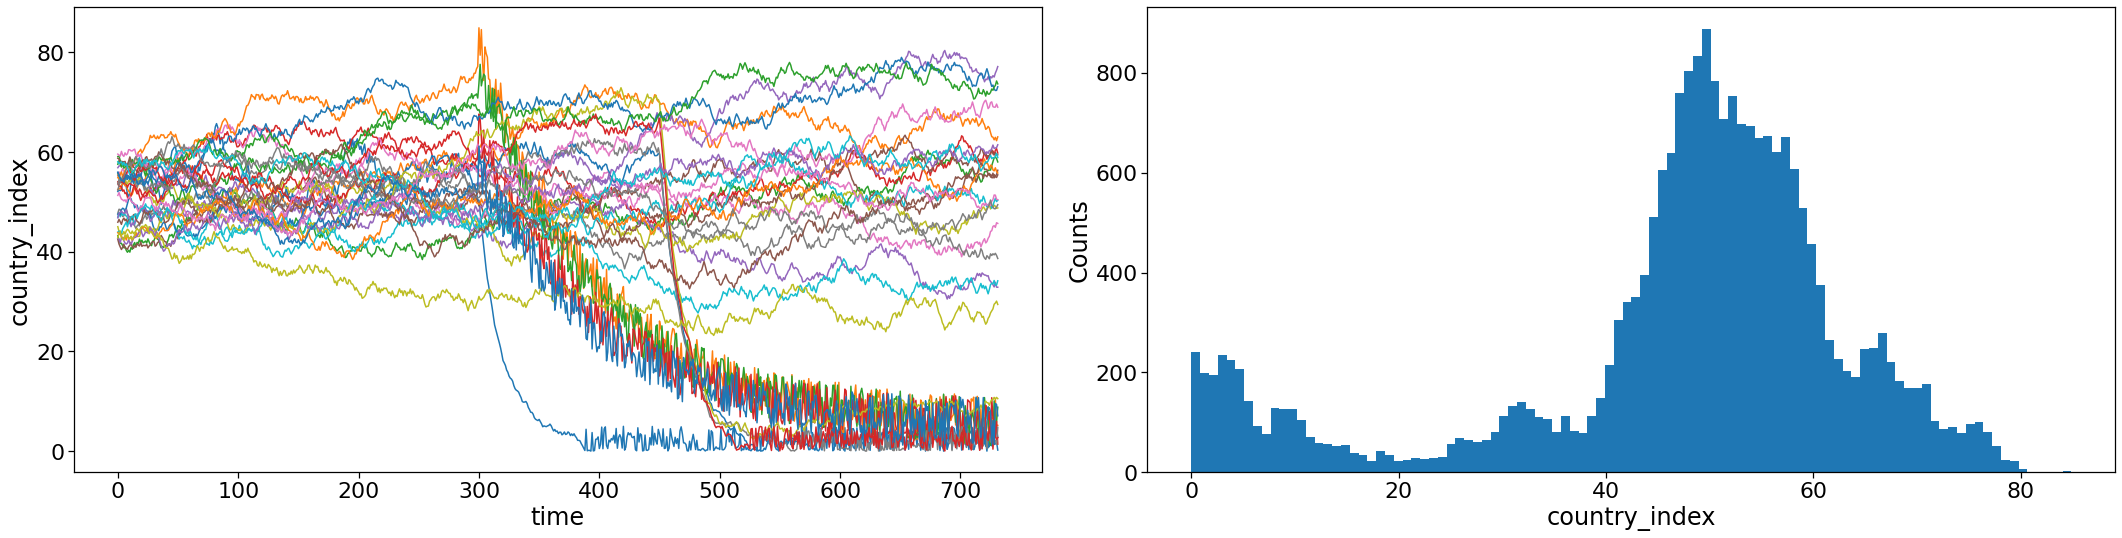

In [6]:
sns.set_context("notebook", font_scale=2)
country_index = np.array([list(v) for v in econ_index.country_index.values]).T
fig, axs = plt.subplots(figsize=(30,8), ncols=2)
ax = axs[0]
plot = ax.plot(country_index)
ax.set_ylabel("country_index")
ax.set_xlabel("time")

ax = axs[1]
plot = ax.hist(country_index.flatten(), bins=100)
ax.set_xlabel("country_index")
ax.set_ylabel("Counts")
plt.tight_layout()

# Rainfall

In [7]:
rainfall_index = pd.read_json("./data_for_test/rainfall.json").transpose()
rainfall_index.head()

,rainfall_mm,timestamps,geometry
91,"[395.61035643864466, 442.7231522964596, 425.45...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","POLYGON ((6.1587021680472 49.45747276779898, 6..."
170,"[402.51418487087494, 363.5393622301558, 406.00...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",POLYGON ((10.991018218254112 58.86620146783461...
48,"[324.1388758141909, 407.141494904022, 363.7524...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","POLYGON ((23.464132188689 53.89106340978399, 2..."
159,"[417.6345277818349, 437.65554079775177, 436.52...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","POLYGON ((16.97433035797341 48.11366146867356,..."
174,"[358.4700059615758, 460.575463749425, 454.6394...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",POLYGON ((22.11218641259055 48.402911248244436...


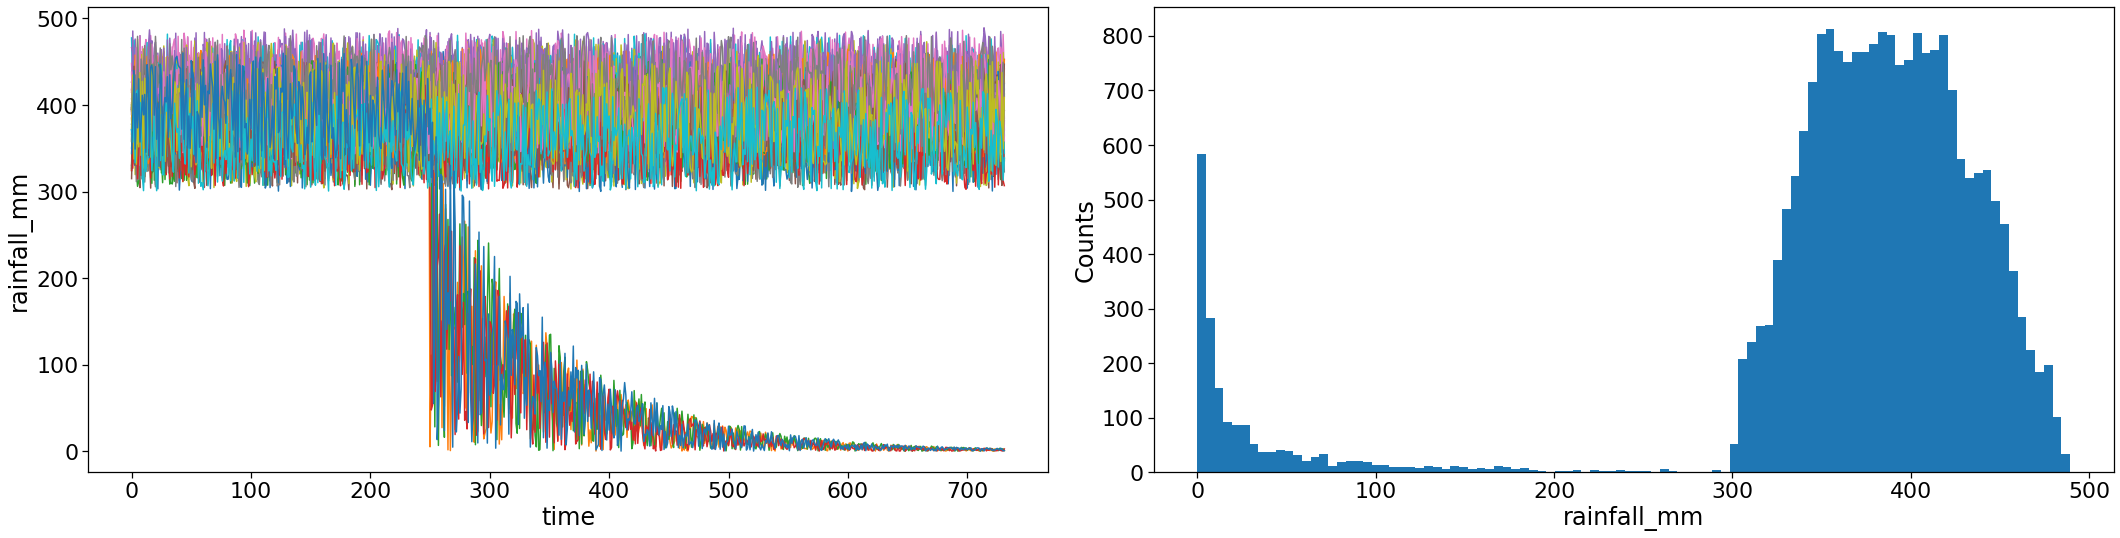

In [9]:
rainfall_mm_ts = np.array([list(v) for v in rainfall_index.rainfall_mm.values]).T

sns.set_context("notebook", font_scale=2)
fig, axs = plt.subplots(figsize=(30,8), ncols=2)
ax = axs[0]
plot = ax.plot(rainfall_mm_ts)
ax.set_ylabel("rainfall_mm")
ax.set_xlabel("time")

ax = axs[1]
plot = ax.hist(rainfall_mm_ts.flatten(), bins=100)
ax.set_xlabel("rainfall_mm")
ax.set_ylabel("Counts")
plt.tight_layout()

# Conflict

In [10]:
conflict_df = pd.read_json("./data_for_test/conflict.json").transpose()
conflict_df.head()

,conflict_index,timestamps
0,"[0.050505050505050005, 0.040404040404040005, 0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[0.10101010101010101, 0.16161616161616102, 0.1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,"[0.27272727272727204, 0.35353535353535304, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,"[0.14141414141414102, 0.13131313131313102, 0.1...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,"[0.23232323232323202, 0.21212121212121202, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


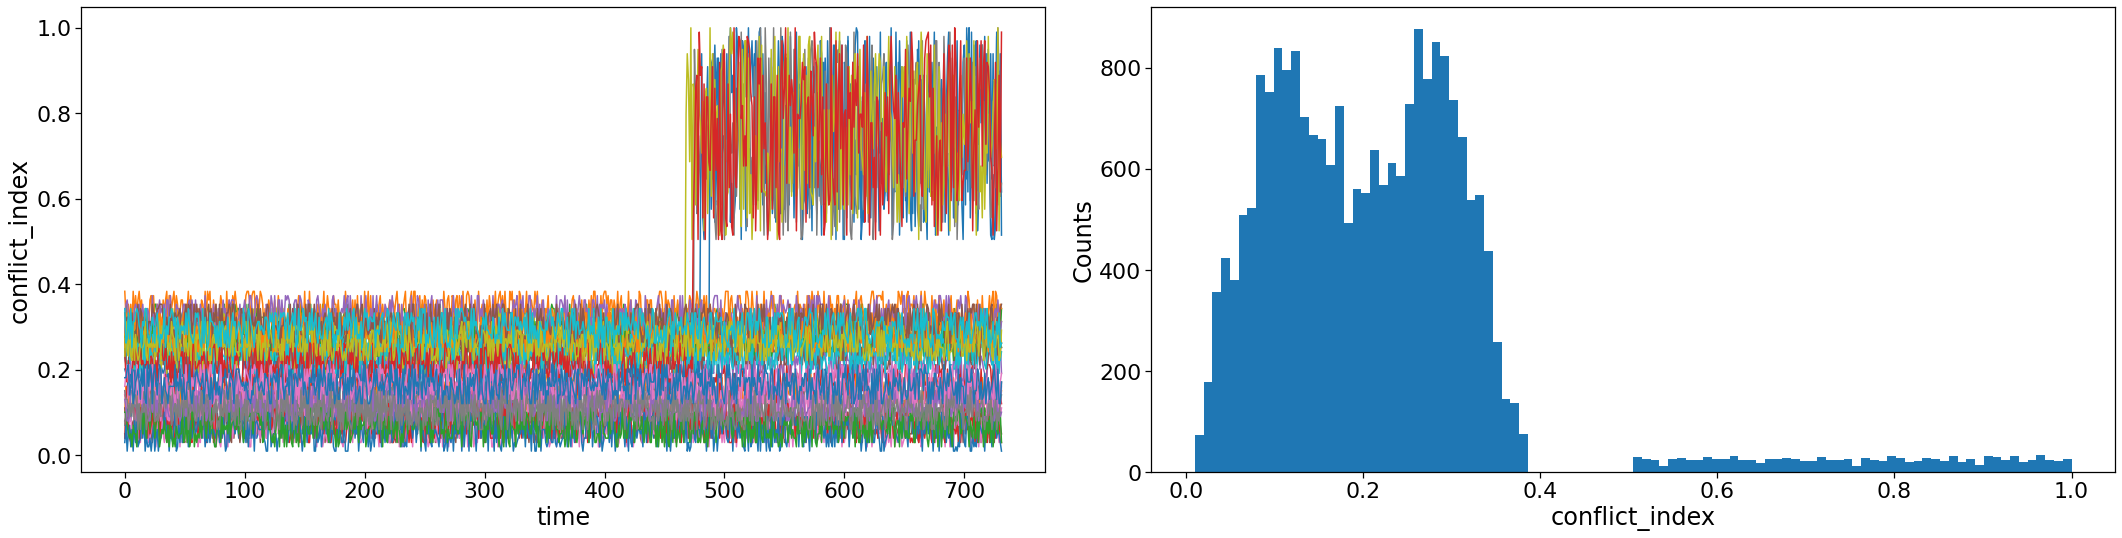

In [12]:
conflict_index = np.array([list(v) for v in conflict_df.conflict_index.values]).T

sns.set_context("notebook", font_scale=2)
fig, axs = plt.subplots(figsize=(30,8), ncols=2)
ax = axs[0]
plot = ax.plot(conflict_index)
ax.set_ylabel("conflict_index")
ax.set_xlabel("time")

ax = axs[1]
plot = ax.hist(conflict_index.flatten(), bins=100)
ax.set_xlabel("conflict_index")
ax.set_ylabel("Counts")
plt.tight_layout()

# Food Security

In [13]:
food_df = pd.read_csv("./data_for_test/food_security.csv")
food_df

,1,2,4,6,7,9,10,12,13,14,...,21,22,23,24,25,26,27,28,29,30
0,0.379915,0.212920,0.395577,0.524374,0.360102,0.332827,0.293149,0.482739,0.457011,0.328523,...,0.291498,0.453569,0.463240,0.233420,0.487649,0.354748,0.426510,0.230998,0.477710,0.386489
1,0.337681,0.203945,0.508193,0.500878,0.319827,0.372290,0.300858,0.532229,0.375571,0.335898,...,0.220976,0.482175,0.375582,0.316806,0.449122,0.427053,0.453808,0.293635,0.504714,0.395092
2,0.467301,0.147999,0.478382,0.429794,0.338845,0.383598,0.333813,0.408605,0.360122,0.343979,...,0.233477,0.467234,0.391929,0.285726,0.467981,0.373224,0.439739,0.264605,0.440472,0.426671
3,0.395523,0.263843,0.507311,0.446375,0.384611,0.286914,0.323963,0.410261,0.483037,0.379435,...,0.271856,0.550391,0.447422,0.217452,0.498702,0.333172,0.423261,0.266282,0.450161,0.423972
4,0.400319,0.261483,0.444369,0.518971,0.340055,0.359969,0.364199,0.429541,0.409313,0.350017,...,0.216382,0.524452,0.428370,0.265088,0.520031,0.402142,0.451595,0.157816,0.492829,0.467907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,0.579203,0.401406,0.151360,0.270680,0.199732,0.108836,0.000000,0.000000,0.000000,0.766654,...,0.462927,0.738055,0.000000,0.590539,0.369395,0.412026,0.291243,0.067840,0.482316,0.000000
728,0.592518,0.467032,0.181878,0.364157,0.199099,0.209263,0.000000,0.000000,0.000000,0.851673,...,0.444422,0.802674,0.000000,0.615813,0.463628,0.370691,0.366629,0.065353,0.483740,0.000000
729,0.573142,0.466549,0.215062,0.280695,0.203455,0.131131,0.000000,0.000000,0.000000,0.891864,...,0.543542,0.776867,0.000000,0.589923,0.429112,0.451131,0.327415,0.097277,0.522053,0.000000
730,0.536528,0.479156,0.112732,0.300122,0.158676,0.195635,0.000000,0.000000,0.000000,0.813918,...,0.475278,0.801391,0.000000,0.581027,0.464819,0.366032,0.391606,0.063917,0.420261,0.000000


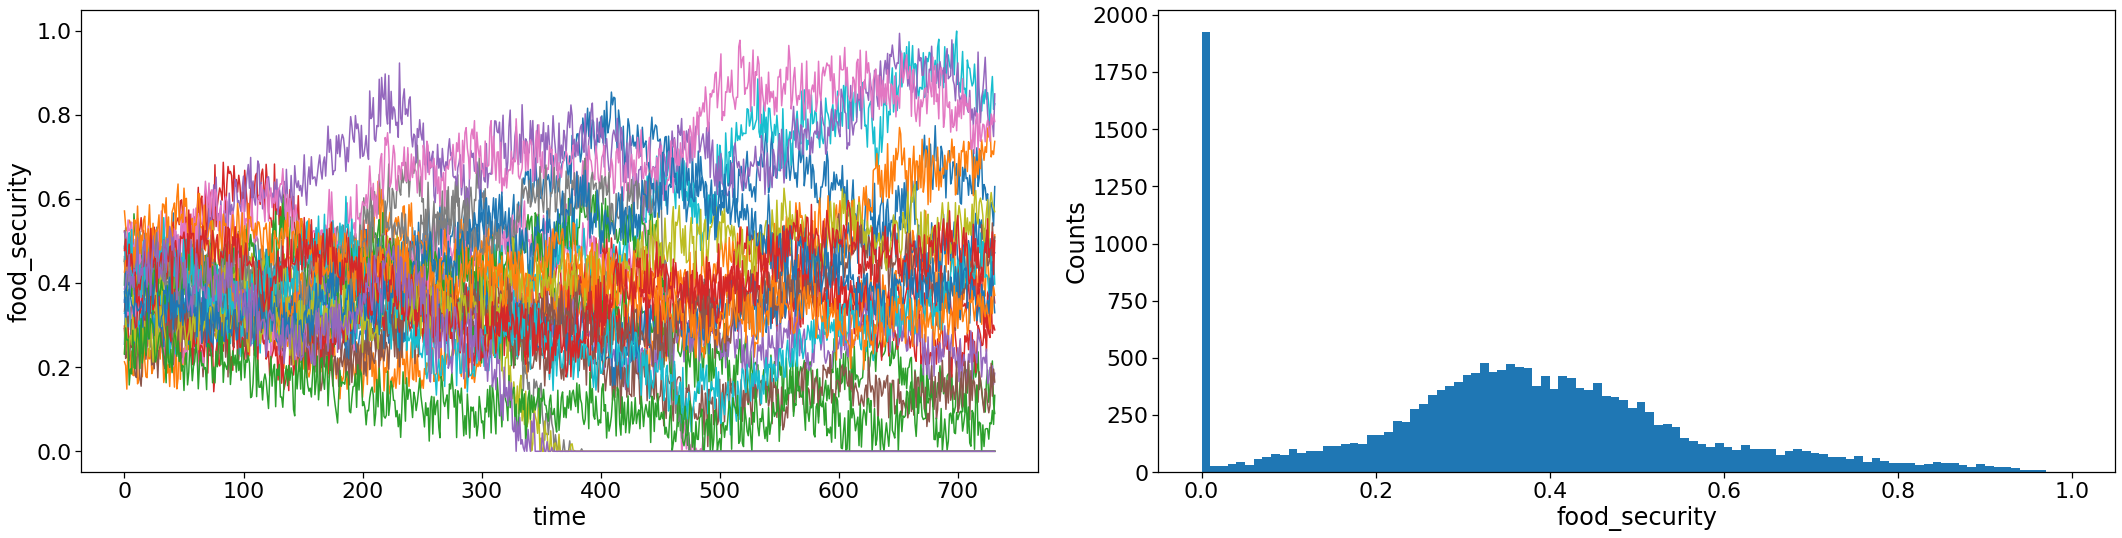

In [14]:
food_security_ts = food_df.values
sns.set_context("notebook", font_scale=2)
fig, axs = plt.subplots(figsize=(30,8), ncols=2)
ax = axs[0]
plot = ax.plot(food_security_ts)
ax.set_ylabel("food_security")
ax.set_xlabel("time")

ax = axs[1]
plot = ax.hist(food_security_ts.flatten(), bins=100)
ax.set_xlabel("food_security")
ax.set_ylabel("Counts")
plt.tight_layout()